### Understanding and Predicting Bank Customer Churn

In banking, customer attrition has emerged as a critical challenge for sustained growth. As the Fed keeps hiking rates, a report from Curinos indicates banks are moving to retain balances at all costs. According to the same Curinos report, customer attrition showed a steep rise in September of last year, rising from 5% of the average bank's portfolio to 16%, impacting both revenue and long-term growth. This shift is faster than we’ve seen historically in other rising rate environments.

To address this issue, it’s critical to have a deep understanding of why customers leave and develop specific and targeted strategies to combat this.

Imagine a scenario where customers, dissatisfied with their banking experience for whatever reason, decide to switch to other institutions or reduce balances, leading to a potential loss of revenue and trust. Traditional methods of customer retention may fall short in identifying the nuanced factors contributing to churn; machine learning may help us get a more comprehensive picture by enabling an understanding of which customer attributes best predict churn status. Once we understand which attributes best predict churn (think a customer's balance, their geography, how many of the bank's products they’re enrolled in, etc.), specific and targeted actions can be taken to address them.

For this analysis, I will be using a dataset that includes information on 10,000 bank customers from a multinational European bank operating in France, Germany, and Spain. To predict instances of customer churn, I will be using a combination of decision tree-based models. These models will consider various customer attributes and establish baseline predictors. By analyzing the importance of these attributes, we can determine which ones are most influential in making churn predictions. If the model achieves a high level of accuracy, and we can identify the most significant features used in the predictions, we can gain a better understanding of why customers leave.

In this project, I prioritize recall as the main error metric, which focuses on minimizing false negatives. Identifying customers at risk of churning is crucial for implementing targeted retention strategies and maintaining a stable and satisfied customer base. False negatives, where customers at risk are not identified, are considered more detrimental than false positives (customers marked as churned when they really haven't).

Since the dataset is imbalanced, with churn instances representing only 20% of the data, accuracy will be examined closely as well.

Looking at accuracy in isolation is a common mistake made in scenarios like this. For example, if my model boasted an accuracy of 80%, it's entirely possible that it simply marked every customer as not churned, completely missing the intended goal.

I plan to oversample the minority class to address this. Since our minority class, churned customers, only make up 20% of the dataset, it's helpful to give the model more examples to learn and train from. When I oversample, aka give the model's training data artificial examples of churn to learn from, it can make better predictions on real data.

### 1. The Data

To find the data I needed I searched through kaggle and Google dataset search. As mentioned above, the dataset I landed on was a set of 10,000 customers from a European multinational bank. It contained the following columns: 

1. customer_id - unique key for each customer.
2. credit_score.
3. country.
4. gender.
5. age.
6. tenure - how long they've been with the bank. 
7. balance - account balance. 
8. products_number - number of the banks financial products each customer is enrolled in. 
9. credit_card - indicates if the customer has a credit card or not. 
10. active_member. 
11. estimated_salary. 
12. churn, used as the target - 1 if the client has left the bank during some period or 0 if he/she has not.

### 2. Modeling Methods

I plan to primarily use XGBoost models for this project. XGBoost is a tree-based model that creates a series of decision trees, each learning from the mistakes of the last. The final tree in the model is an aggregation of every tree that came before it.

Once that final tree is reached, it can be further tuned and refined until a desired level of performance is achieved. After achieving that performance, you can ask the tree which features it used most when making its decisions to begin to paint a picture of the answers we want, i.e., which customer attributes most impact a customer's churn status. We'll ask the models we create which features it used most when predicting a customer as churned or not churned. 

Tree-based models like XGBoost, as opposed to other methods, are typically faster, require less pre-processing of the data used to train the model (no scaling is neccesary for example)\, are more interpretable than other options, and account for feature importance in a more understandable way then other models. Explainability and interpretability are of chief importance. 

### 3. Data Cleaning

The dataset was fairly clean from the start, requiring only minor adjustments. I knew the 'customer_id' feature would not play a role in predicting our target, so I dropped it.

I identified our class balance (80% of customers had not churned, 20% had), renamed two columns for clarity (changing 'tenure' to 'tenure_years' and 'products_number' to 'number_of_products'), and checked for duplicates and missing values (there weren't any).

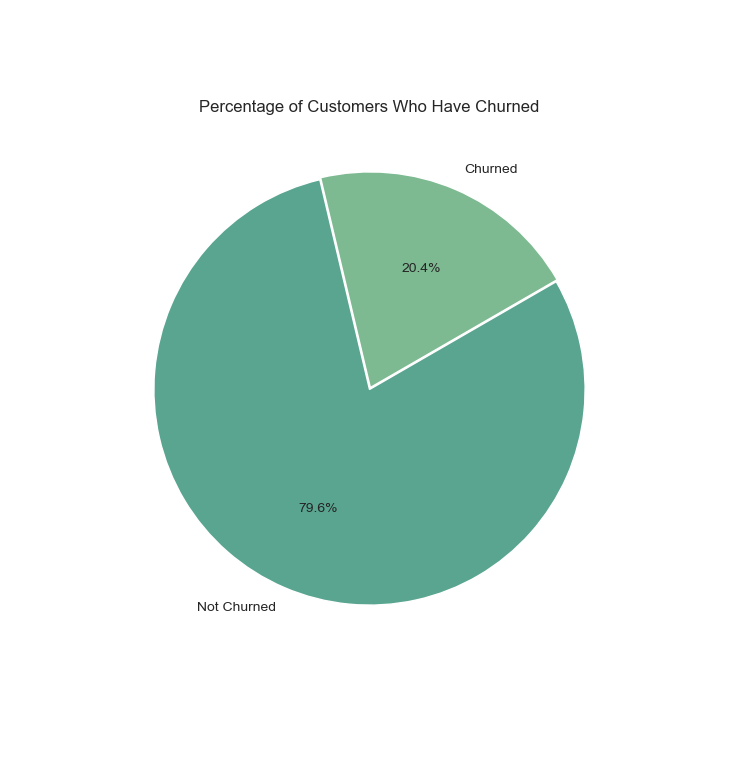

### 4. EDA

I began EDA by exploring the distributions of my numerical variables. Out my 11 total features (down from 12 after dropping the customer id), 9 were numerical. 

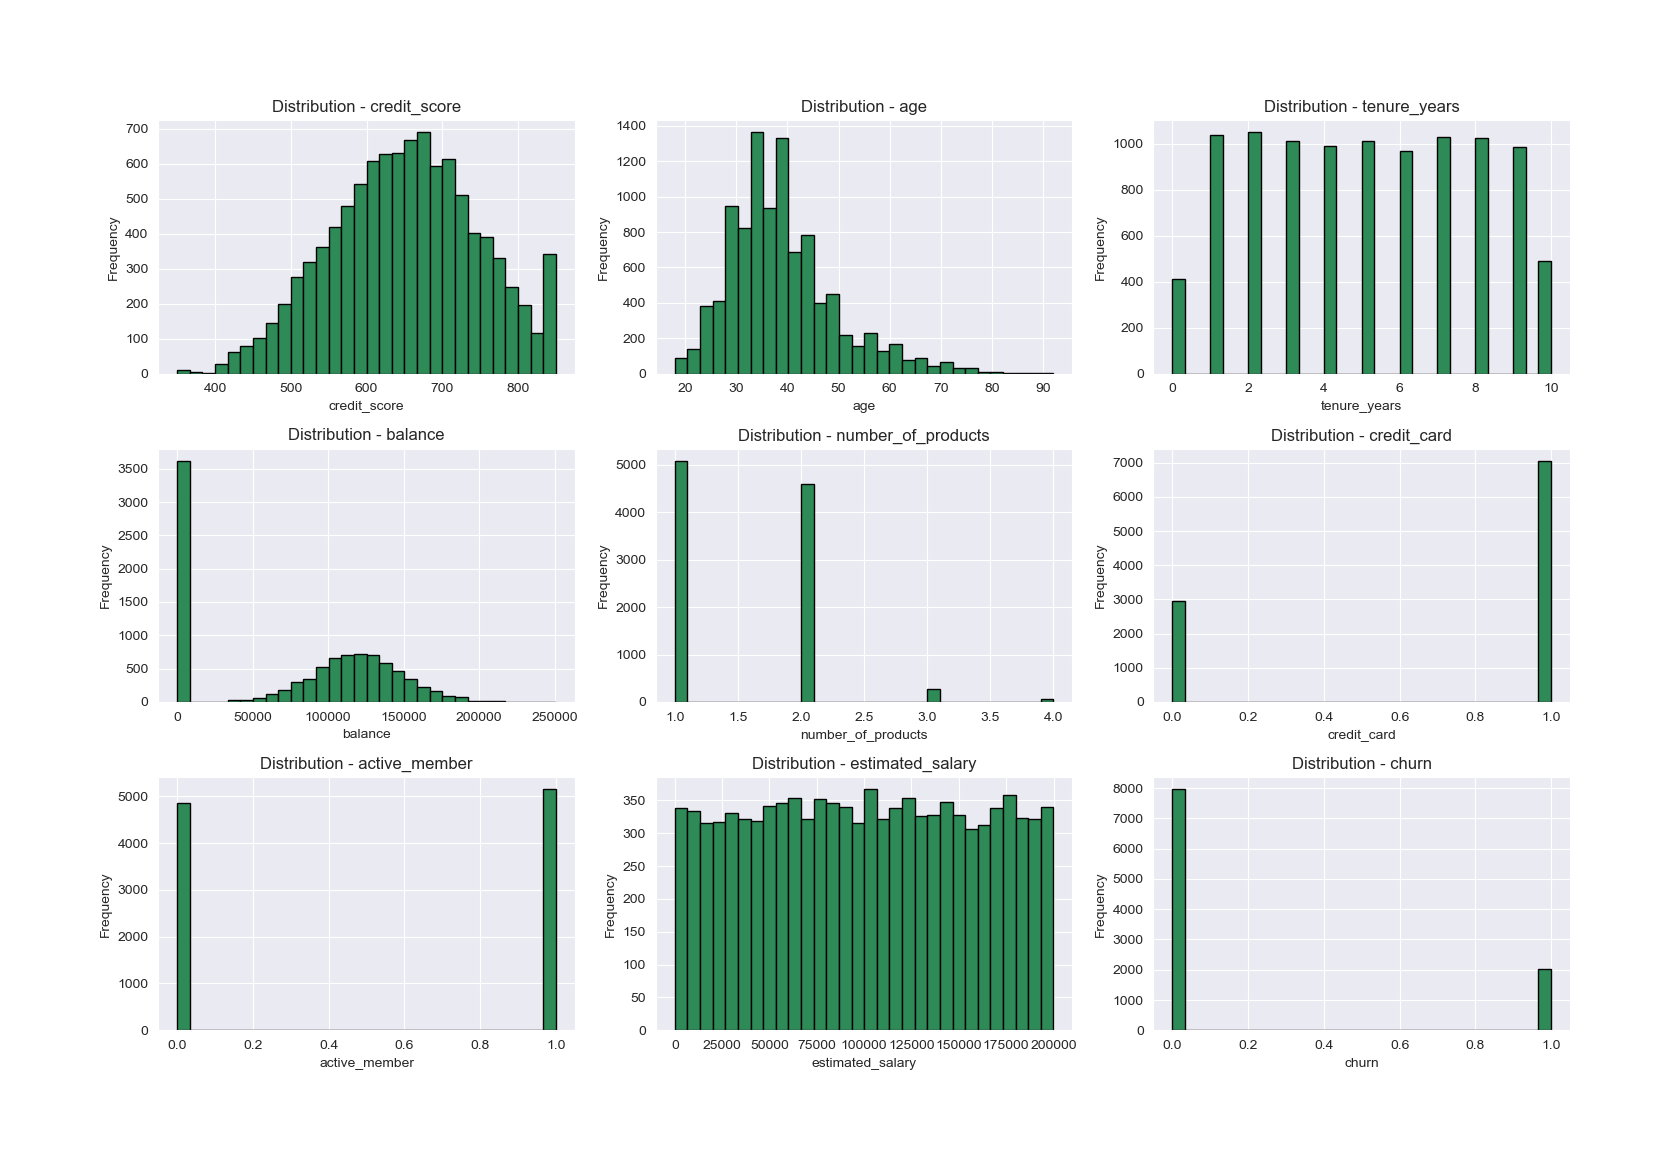

The 'balance' variable caught my eye first. We see a high imbalance in customers who don't have any money in the bank, but then a normal distribution for customers who do have money in the bank.

'age' and 'credit_score' look fairly normal. Age does have a slight left skew, and the credit score is a bit imbalanced towards the right, with more super-high credit customers than super-low credit customers.

The 'tenure' variable appears evenly distributed, and most customers have one or two products with the bank.

Our target variable, 'churn,' is imbalanced, but we already knew this.

Nothing alarming from these distributions, but it gave me ideas of where to explore first.

I decided to hone further in on age and credit score first.

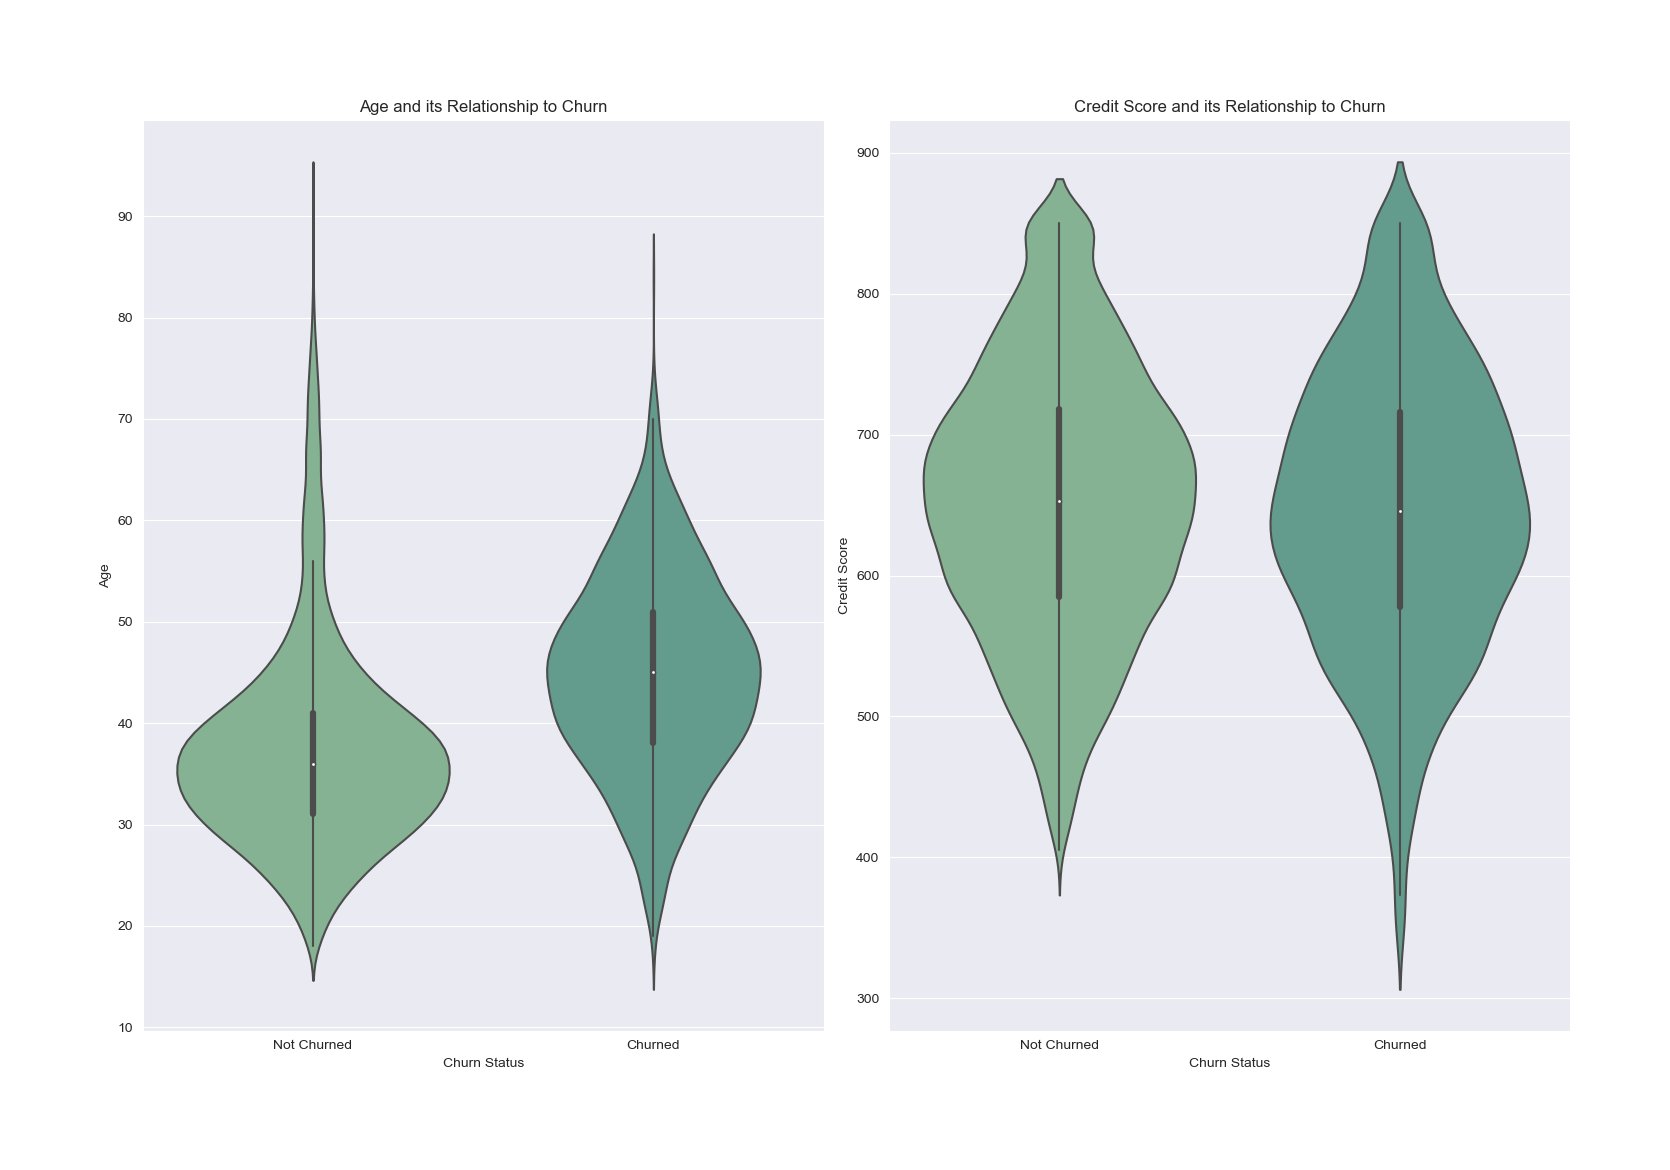

Customers who churn are a tad older than those who don't, but credit score didn't seem to tell me much. Density of the credit score data points appears close, as do the medians and quartiles. I would have thought credit score to be a better indicator of churn, but it didn't appear that way on initial inspection. 

Next I ran some count plots to examine churn counts among various customer attributes. 

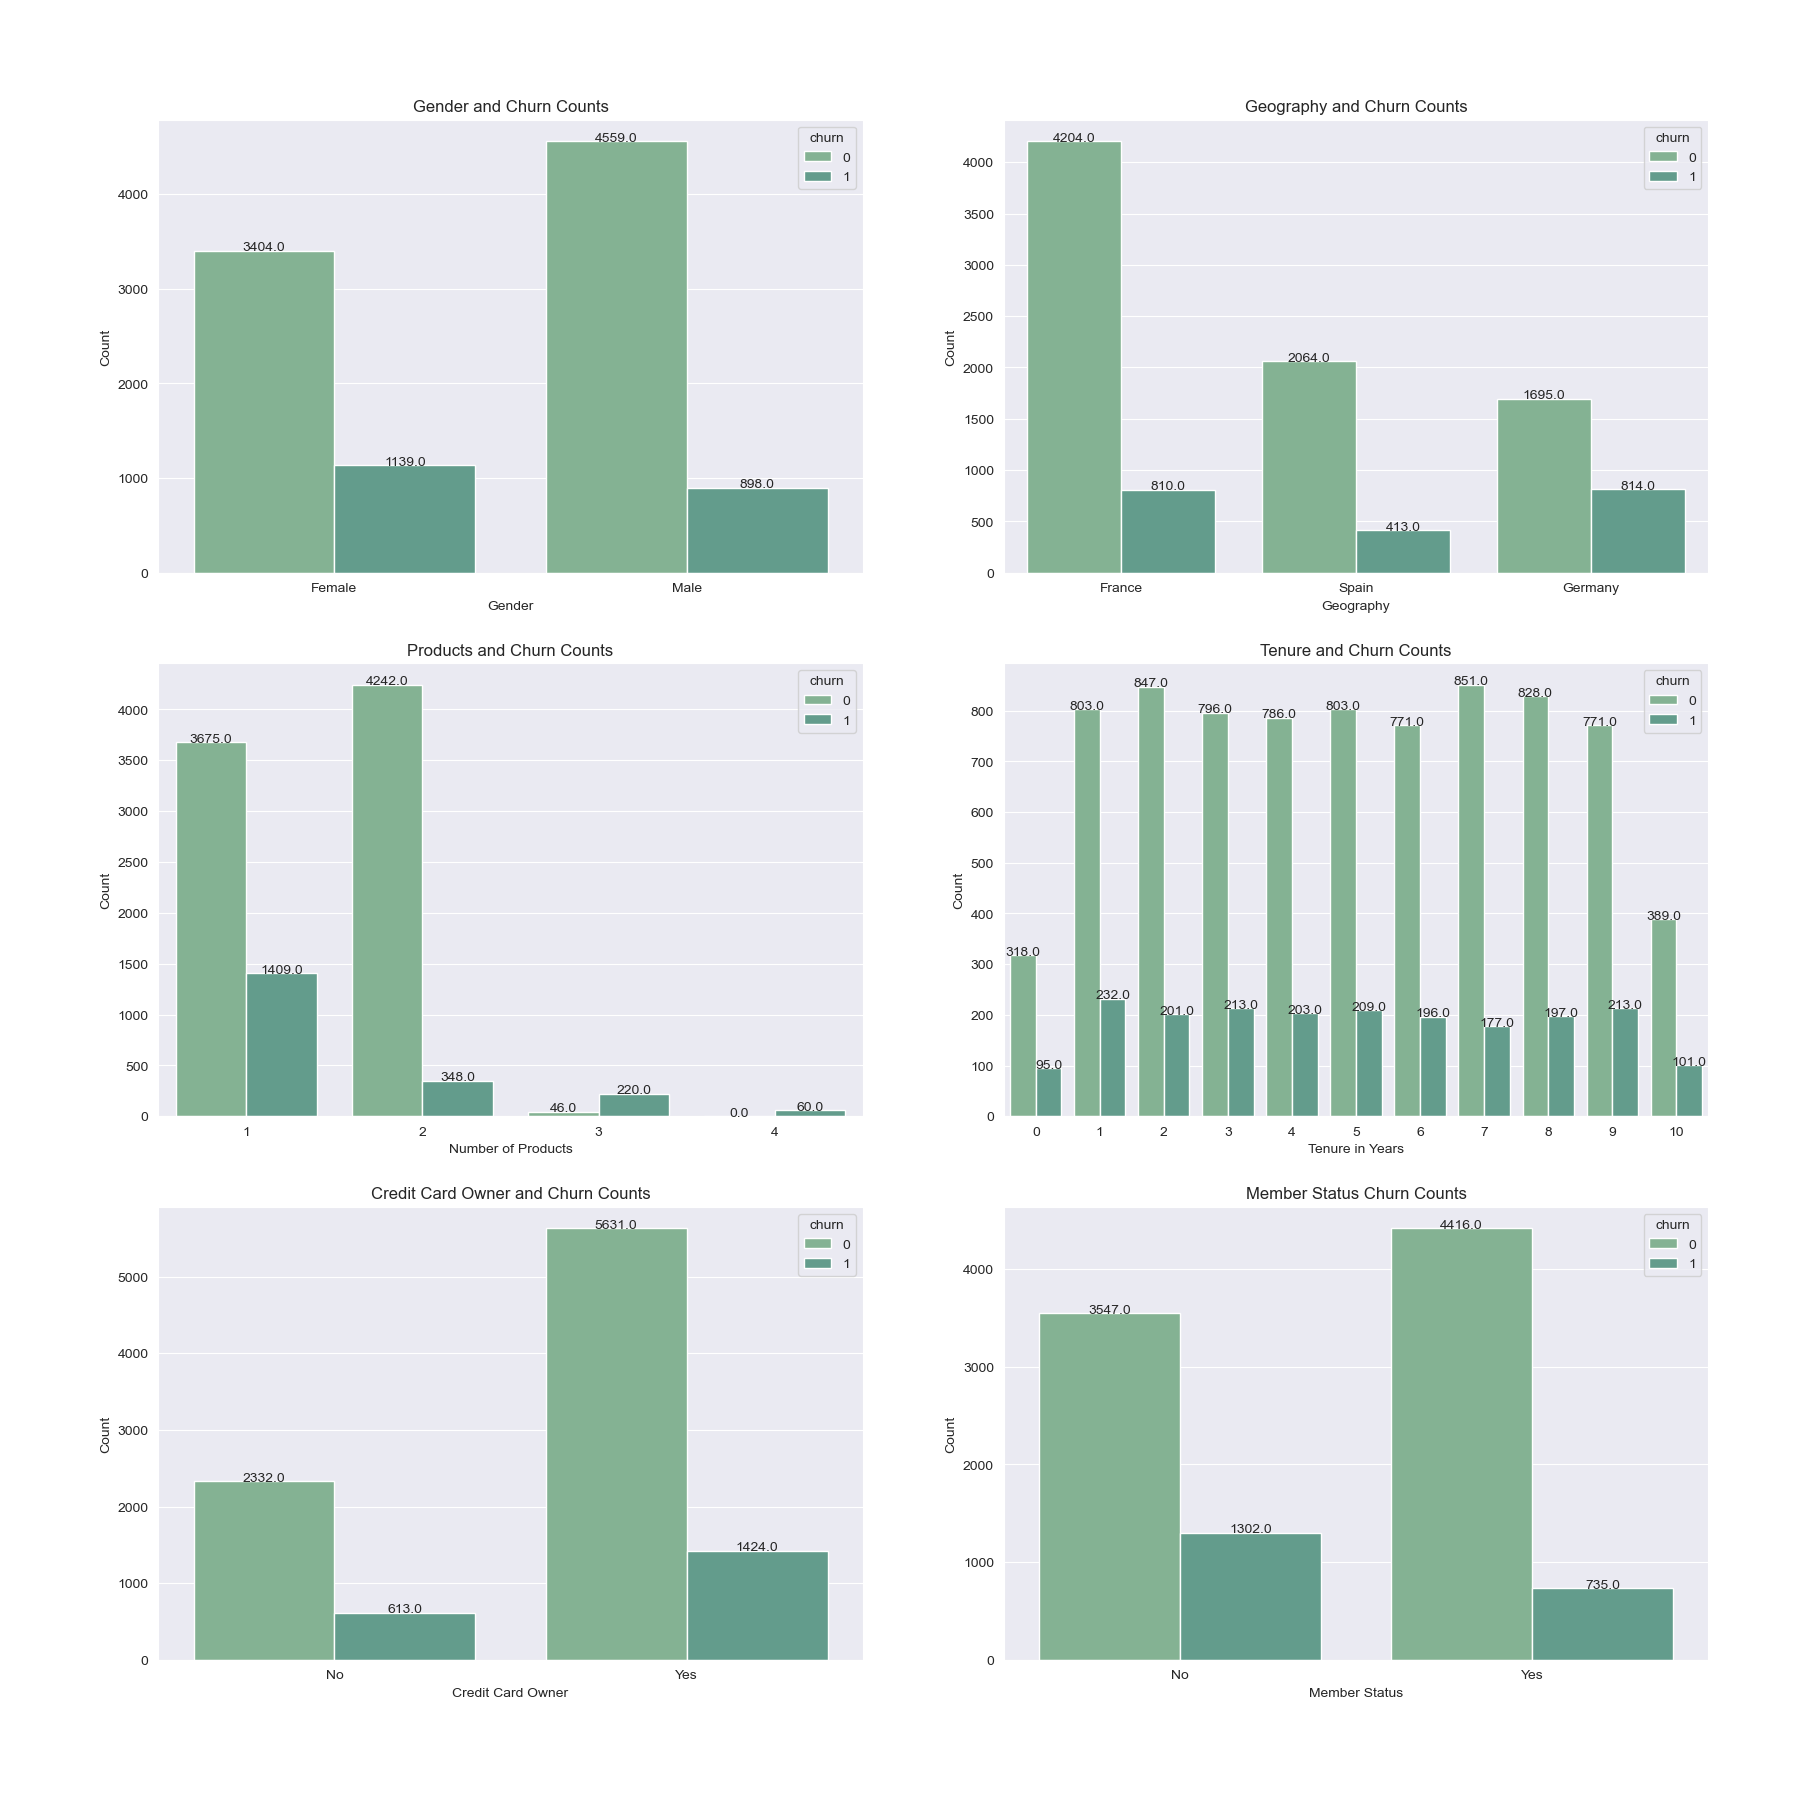

Churn imbalance appeared in favor of males, with a higher number of women churning in total and a greater proportion of women churning when compared to the total.

33.4% of female customers had churned, while only 19.6% of male customers had. A 70% increase. 

It appeared Germany also had a higher churn imbalance than France and Spain. A greater proportion of customers in Germany had churned when compared to the total number of customers in the country. Germany also had the highest total number of churned customers at 814.

48% of all customers in Germany had churned, while only 20% had from Spain, and 19.2% had from France. What was happening in Germany to drive this massive imbalance?

More imbalances were observed between the number of products a customer had and churn status. There wasn't much data on customers with three and four products (although the imbalance on the data available was clear), and on products one and two, a larger imbalance of churn was observed across customers with one product compared to customers with two.

Tenure appeared fairly stable, with most customers churning after one year, but the balance remained stable across each tenure year. 

The balance among owning a credit card or not and churn appeared close.

There was an imbalance between member status and churn. Customers who were not members churned 36.7% of the time, while customers who were members churned only 16.6% of the time. This importance will be highlighted further in modeling 

At this point, a picture was starting to form. We could see females churned more often than males, German customers were churning at a much higher rate than other geographys, and member status seemed an important indicator. I felt comfortable moving on to modeling at this stage, but I needed to do some pre-processing first. 

### 5.  Pre - Processing

Pre-processing steps were simple this time. There were only two categorical variables (gender and country), and I one-hot encoded them. After splitting into X and y, I further split into training and testing sets with a 25% test size (meaning my testing data was 25% of the original dataset, and my training data was 75% of the original dataset).

Oversampling the churn class would come later.

### 6. Modeling

Knowing the dataset was imbalanced with a 79.6/20.4 split (79.6% customers who had not churned, 20.4% customers who had), I still wanted to get some baseline model results without oversampling. I needed those baseline results for comparison. I ran my baseline XGBoost model with the results below.

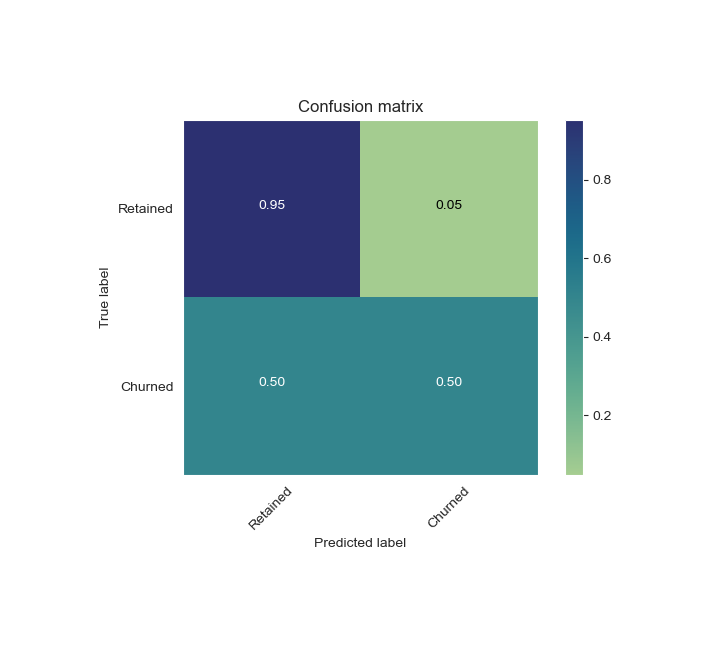

As mentioned previously, I planned on focusing on class 1 (churned) recall, seen in the bottom right of the graph. What this is telling us is that out of all positive churn cases, the model only found half of them. That's the same odds as flipping a coin, not very helpful. Time to oversample our training data to give the model more instances of churn to learn from. More instances to learn from enables the model to make better predictions.

A mistake I made during this step was oversampling both the training data and the testing data, leading to data leakage. What that means is the same data samples were likely introduced into both sets, so some of the data the model trained on was the same data it tested itself on. It's like seeing the answers for a test before you take it; this then leads to inflated performance metrics. When I modeled with the oversampled training and test data, results increased dramatically but could not be relied upon. The inflated results likely would not be seen once tested on new, unseen data. Once I saw I made this mistake, I reverted back to square one and ensured only my training data was oversampled. Results of modeling via XGBoost with oversampled training data can be seen below. 

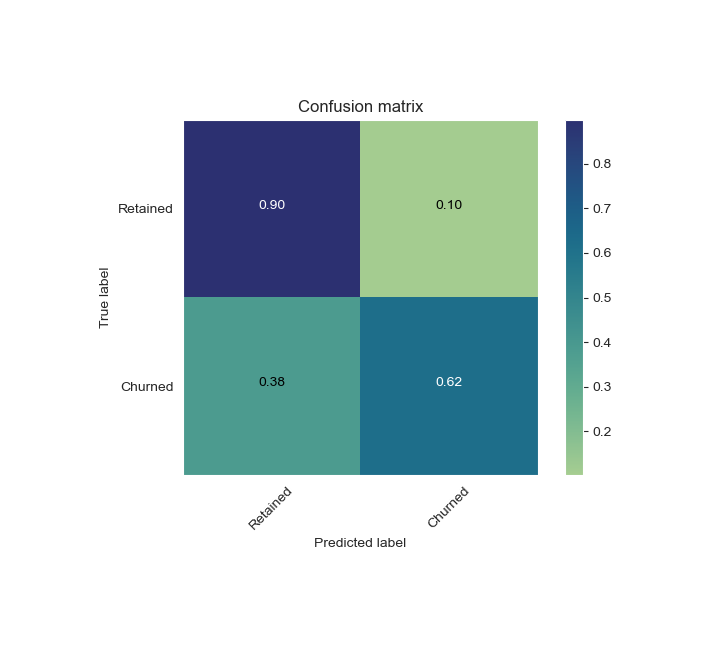

Results from the oversampled training data saw a 12% increase in class one recall.

What this is telling us now is that for every positive instance of a customer churning, the model identified 62% of them correctly. A solid improvement, but there's more to be done. What's not seen by this confusion matrix was the drop in class one recall that came from this change. You can see this below.

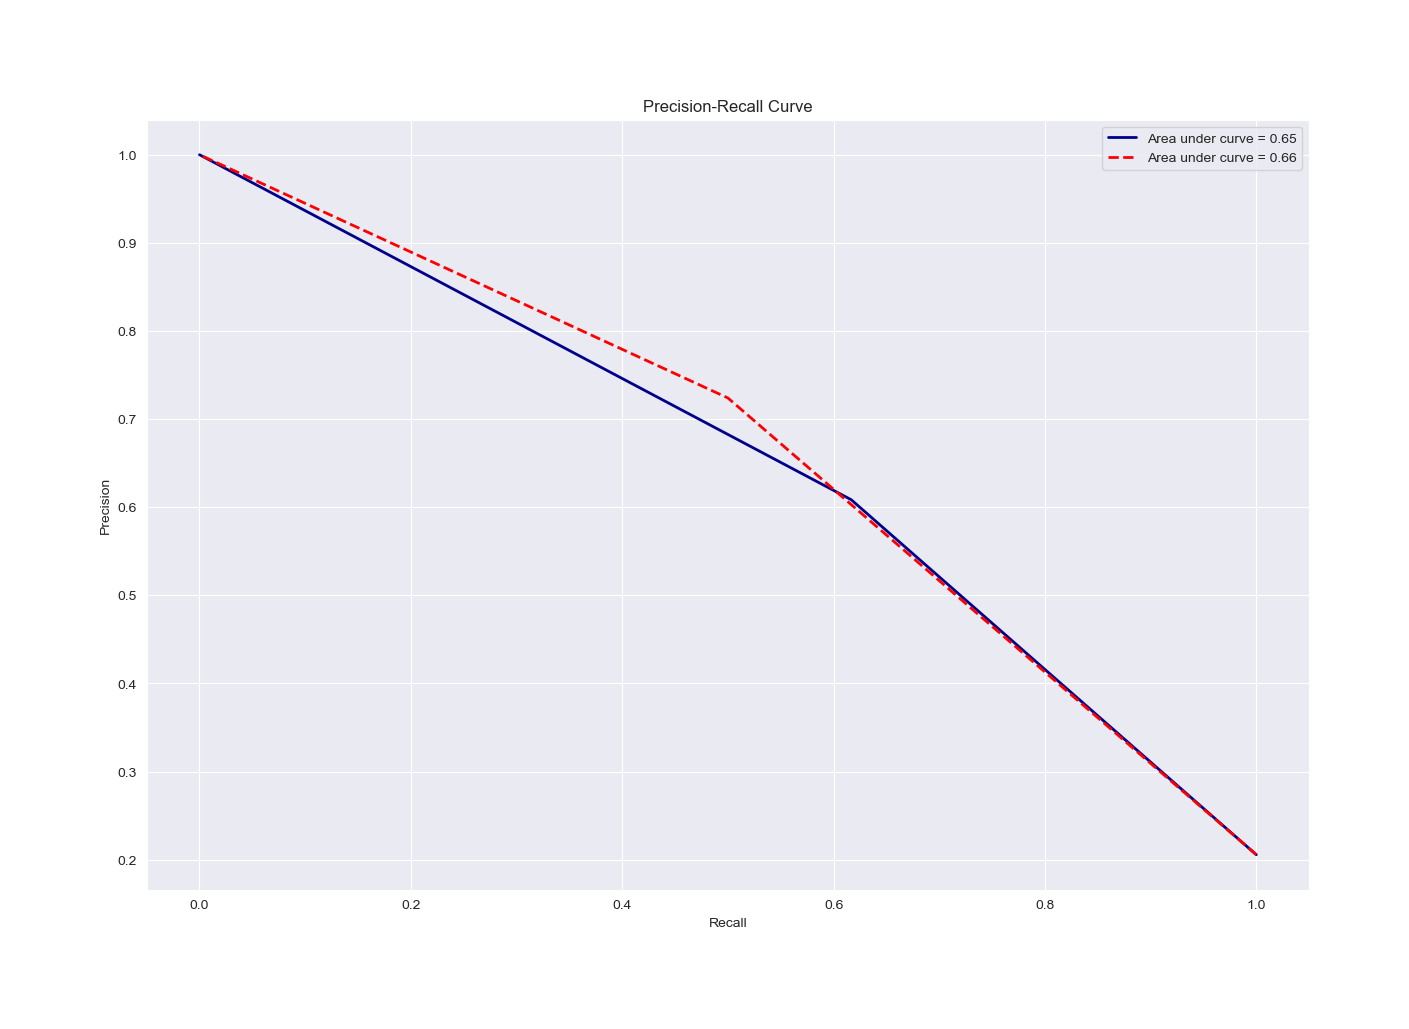

An increase in class 1 recall at the cost of class 1 precision. This drop highlights the importance of understanding which metrics to focus on in the context of the end goal. For this project, we're focusing on class 1 recall, and I'm okay with the drop in precision, but this will not be the case for every project. Metrics must be examined in the broader context.

Next, I plotted feature importance. When looking at XGBoost feature importance, you can interpret the results as the features most important for making predictions. It evaluates the contribution of each feature in the model's decision-making process. Knowing this helps us focus on the most influential factors. The features most important to the model can be thought of as the features most important to predicting churn.

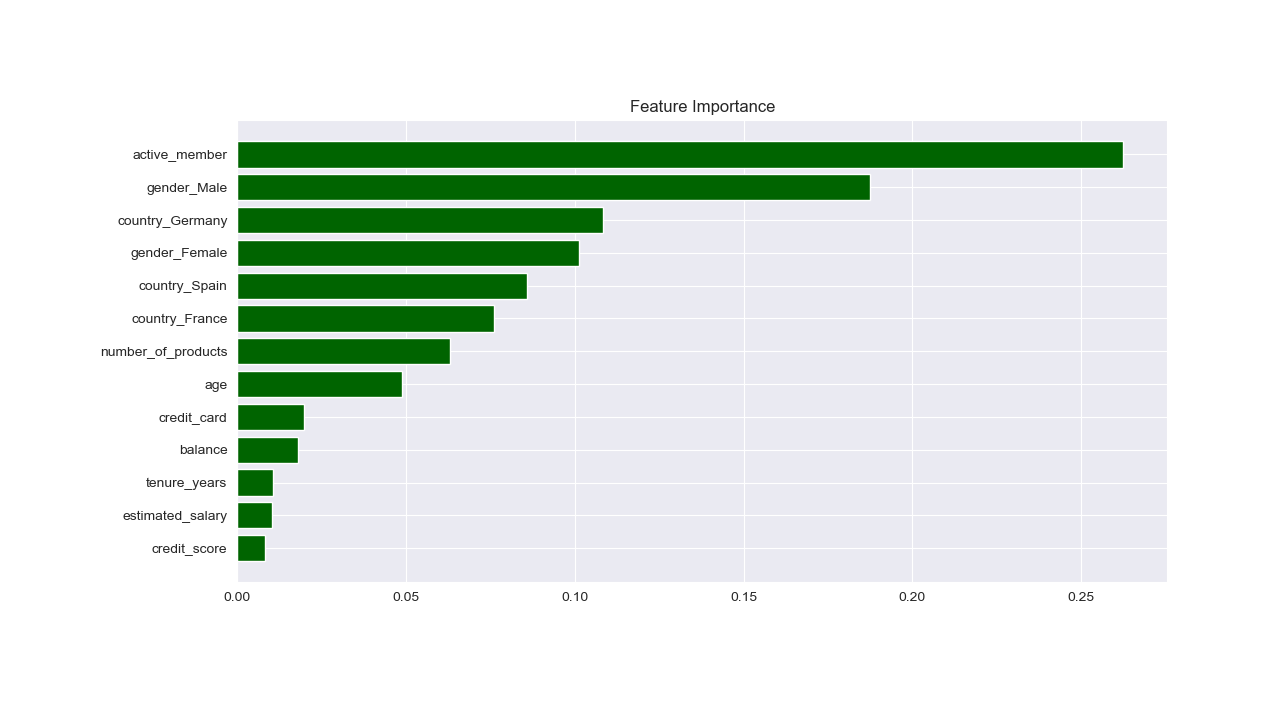

Active member and the male gender feature seemed most important from this model. When thinking about how that male feature was created, it was formed through one-hot encoding our original 'gender' column. If the column is 1, that customer is male; if the column is 0, they are female. Having both a male and female column is then redundant, as you only need one to get the necessary data. I started with dropping that gender_male feature to examine how the results changed. If a positive increase is seen, then we know while it may have been important in the decision making process, it was important in driving a wrong prediction. Let's see

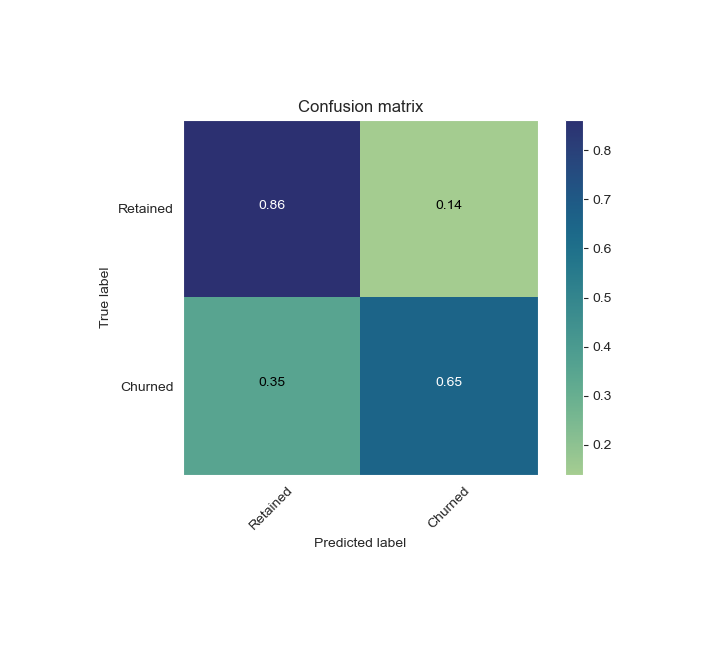

Class 1 recall increased again from 62% to 65%, a 3% increase. We know have a 15% increase in our class one recall as a result from two primary changes: 

1. Oversampling the training data
2. Oversampling the testing data

With an increase this large, it's plausable to just assume this increase really was due to our changes, but assumptions should never be relied upon, so I ran a McNemar test to understand if our changes really were driving these results. See below. 

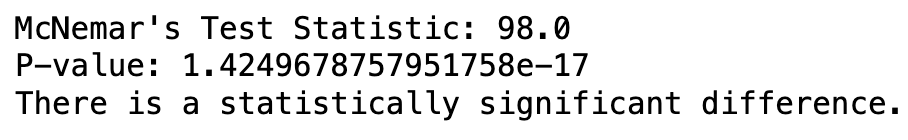

What this is telling us is that if the 15% increase seen really was due to random chance, the likelihood of observing a value at least as extreme as that 15% increase is only 0.000000000000000014249678757951758%. I feel fine rejecting the null hypothesis (our null hypo being that our changes did NOT impact results in a meaningful way) given our p-value. 

Next I ran a 95% confidence interval, see bwlow. 

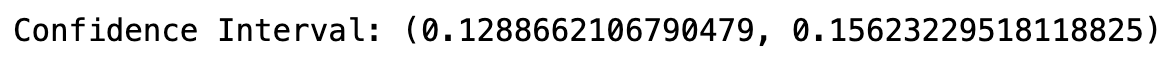

What does this tell us? If I were to run this comparison many times over, 95% of the time, my percentage increase from the baseline model would be anywhere between 12.8% and 15.6%. A solid increase and one I'd be comfortable defending.

The last feature I examined is the active_member feature, as it was deemed the most important from our feature importance graph. Again, this only tells us the feature appeared most across all boosting rounds and could be driving a positive or a negative change. Once It was dropped, results declined and a quick McNemar test confirmed this. Active member is an important and positive predictor of change. 

### 7. Conclusions

#### Final XGBoost Model Stats:

##### Precision for Class 0 (Customer Retained): 90%. This means that for all positive class 0 predictions (predicting a customer as retained), 90% of them were correct.

##### Recall for Class 0 (Customer Retained): 86%. This means our model was able to capture 86% of positive instances. 86% of the time, if a customer was indeed retained and not churned, the model captured it.

##### Precision for Class 1 (Customer Churned): 55%. This means that for all positive class 1 predictions (predicting a customer as churned), 55% of them were correct.

##### Recall for Class 1 (Customer Churned): 65%. This means our model was able to capture 65% of positive instances. 65% of the time, if a customer was indeed churned and not retained, the model captured it. A 15% increase from the baseline model. 

Class 1 precision remains a problem, and the reality is I could spend weeks and months methodically working through this to further improve results. In the real world, I'd certainly do that.

For the purposes of this project, I can only take it so far, but I'm happy with what I've learned as a result. Tying back with my EDA, what can I walk away from this and say to the bank?

For the given data:

EDA showed more customers who were not active members churned, and removing that feature from modeling drove negative results. Given the two in combination, it appears the chance of losing a customer who is an active member is lower than the chance of losing a customer who is not an active member.

Customers with two products are least likely to leave the bank, with churn % greatly increasing past two products, though data there is limited. 

Credit Score does not appear a significant factor in customer attrition, shown both in EDA results and model feature importance.

The average age of customers who have churned is higher than the average age of customers who have not churned, and it appears fairly significant from modeling as well.

Germany exhibits the highest churn rate, both as an absolute total and as a percentage compared to total customers.

Female customers are far more likely to churn than male customers.

Given the findings, a strategy moving forward may be to further investigate what's happening in Germany and what's happening with female customers to drive abnormal attrition rates among both.

### 8. Moving Forward

Moving forward, I would perform the same type of analysis seen for the male feature and the active member feature on every feature in the dataset. Once that was done, I could move onto other optimization techniques. The reality is, optimizing a model can take many months, much more time than the few weeks allotted for this project. There are so many different approaches to optimizing a model, so many new ideas and approaches coming out every day. It can be overwhelming to try and consider them all.

In the end, we need any model we create to accomplish a specific goal tied to a concrete business objective. Once the model is performing in such a way that it accomplishes that goal, it's time to move on. As for my model, it's not there yet, but it's getting there. For the purposes of this project, I'm leaving things here, but I'm confident I could drive class one recall higher given enough time. The question then becomes: Is the time and resources allotted to building the model worth the potential payout? All things to be carefully considered. 